In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


Using the automobile dataset to perform EDA from scratch

In [2]:
#### load the movie dataset and create their dataframes
df = pd.read_csv('automobile.txt')
df.head(30)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

DATA CLEANSING

Cleaning up the data, identifying redundant or unnecessary columns

In [4]:
# Discovering the missing data
missing_values_count = df.isnull().sum()
missing_values_count[:27]

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
# Sorting out the normalized losses missing data
missing_column = df.loc[:,['normalized-losses']]
#missing_column.loc[missing_column['normalized-losses'] == '?']
missing_column.value_counts()

normalized-losses
?                    41
161                  11
91                    8
150                   7
104                   6
134                   6
128                   6
103                   5
102                   5
168                   5
65                    5
74                    5
85                    5
94                    5
95                    5
122                   4
118                   4
93                    4
106                   4
148                   4
83                    3
154                   3
101                   3
125                   3
137                   3
115                   3
153                   2
108                   2
110                   2
113                   2
89                    2
87                    2
119                   2
81                    2
145                   2
164                   2
197                   2
194                   2
192                   2
188                   2
129                   

In [6]:
# removing normalized-losses column as I am not sure what is contained within the data and unaware of 
df = df.drop(df.loc[:,['normalized-losses']],axis=1)
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

Conversion of datatypes

In [7]:
# Checking the datatypes that I might need to convert to int
df['price'].dtype

dtype('O')

In [8]:
df['peak-rpm'].dtype

dtype('O')

In [9]:
df['horsepower'].dtype

dtype('O')

In [10]:
df['stroke'].dtype

dtype('O')

In [11]:
df['bore'].dtype

dtype('O')

In [12]:
# Changing the dtype of the values above to_numeric
df.loc[:,['price', 'peak-rpm','horsepower','stroke','bore']] = df.loc[:,['price', 'peak-rpm','horsepower','stroke','bore']].apply(pd.to_numeric, errors='coerce')

The following lines of code display if the datatypes have been converted from the linke above

In [13]:
df['price'].dtype

dtype('float64')

In [14]:
df['peak-rpm'].dtype

dtype('float64')

In [15]:
df['horsepower'].dtype

dtype('float64')

In [16]:
df['stroke'].dtype

dtype('float64')

In [17]:
df['bore'].dtype

dtype('float64')

Confirming that the cleansing and the conversion has worked from the coding above

In [18]:
# Displaying all the columns that currently exist within the dataset
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

Time to Explore what answers for questions that the dataset might possess

The number of cars that exist within the dataset

In [19]:
# The car makes that currently exist within the dataset
makes_df = df['make']
makes_df.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

The number and type of aspirations within the dataset

In [20]:
# The type of aspiration the dataset currently contains
aspiration_df = df['aspiration']
aspiration_count = aspiration_df.value_counts()
aspiration_count

std      168
turbo     37
Name: aspiration, dtype: int64

The number of cars that are either using fuel of diesel

In [21]:
# the fuel type for each make
fuel_make_df = df.loc[:,['make','fuel-type']]
fuel_make_df.head()

,make,fuel-type
0,alfa-romero,gas
1,alfa-romero,gas
2,alfa-romero,gas
3,audi,gas
4,audi,gas


In [22]:
fuel_make_df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

The price of each make and also the maximum and the minimum price for each car

In [23]:
# The price of each make
price_make_df =  df.loc[:,['make','price']]
price_make_df.head()

,make,price
0,alfa-romero,13495.0
1,alfa-romero,16500.0
2,alfa-romero,16500.0
3,audi,13950.0
4,audi,17450.0


In [24]:
# 5 Most expensive cars
expensive_cars = price_make_df.sort_values(by=['price'],ascending=False)
expensive_cars = expensive_cars.iloc[:7,]
expensive_cars

,make,price
74,mercedes-benz,45400.0
16,bmw,41315.0
73,mercedes-benz,40960.0
128,porsche,37028.0
17,bmw,36880.0
49,jaguar,36000.0
48,jaguar,35550.0


In [25]:
# 5 cheapest cars
cheap_cars = price_make_df.sort_values(by=['price'],ascending=True)
cheap_cars = cheap_cars.iloc[:7,]
cheap_cars

,make,price
138,subaru,5118.0
18,chevrolet,5151.0
50,mazda,5195.0
150,toyota,5348.0
76,mitsubishi,5389.0
32,honda,5399.0
89,nissan,5499.0


A comparison of MPG for both in the city and also on the highway that each make consumes

In [56]:
# Comparison of Each makes MPG
mpg_make_df = df.loc[:,['make','city-mpg','highway-mpg']]
mpg_make_df = mpg_make_df.sort_values(by='highway-mpg',ascending=False).iloc[:30,]
mpg_make_df

,make,city-mpg,highway-mpg
30,honda,49,54
18,chevrolet,47,53
90,nissan,45,50
160,toyota,38,47
159,toyota,38,47
182,volkswagen,37,46
184,volkswagen,37,46
44,isuzu,38,43
20,chevrolet,38,43
19,chevrolet,38,43


The number of body types within the dataset

In [57]:
# the number of body-styles within the dataset
body_style_df = df['body-style']
count_body_style = body_style_df.value_counts()
count_body_style

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

VISUALIZATIONS

The amount of makes within the dataset

<AxesSubplot:xlabel='count', ylabel='make'>

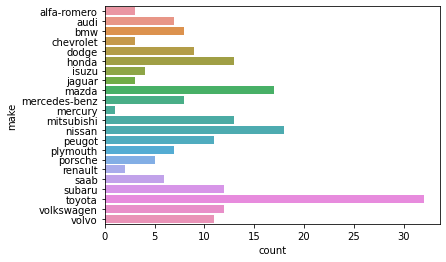

In [58]:
#The amount of makes within the dataset
#fig = plt.figure(figsize=(1,1))
sns.countplot(y='make', data=df)

Visualization of how many car are either std or turbo aspiration

<AxesSubplot:xlabel='count', ylabel='aspiration'>

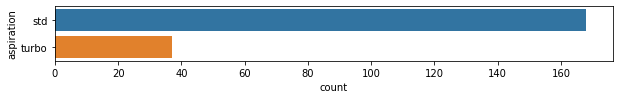

In [59]:
# Aspiration type
fig = plt.figure(figsize=(10,1))
sns.countplot(y='aspiration', data=df)

What are the 7 most expensive cars

<AxesSubplot:xlabel='make'>

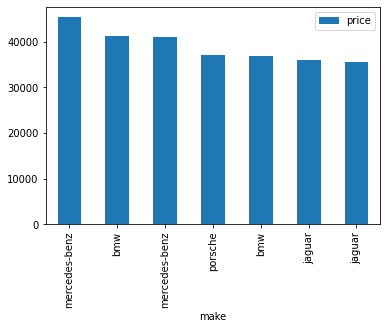

In [60]:
# 7 Most expensive Cars 
expensive_cars.plot(kind='bar', x='make')

<AxesSubplot:xlabel='make'>

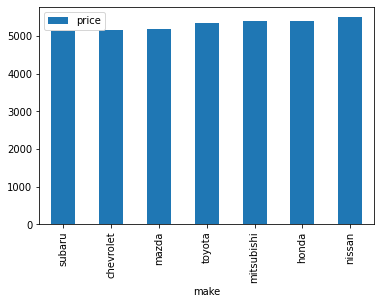

In [64]:
# 7 most cheapest cars?
cheap_cars.plot(kind='bar', x='make')

A comparison chart of both city and highway MPG

<AxesSubplot:xlabel='make'>

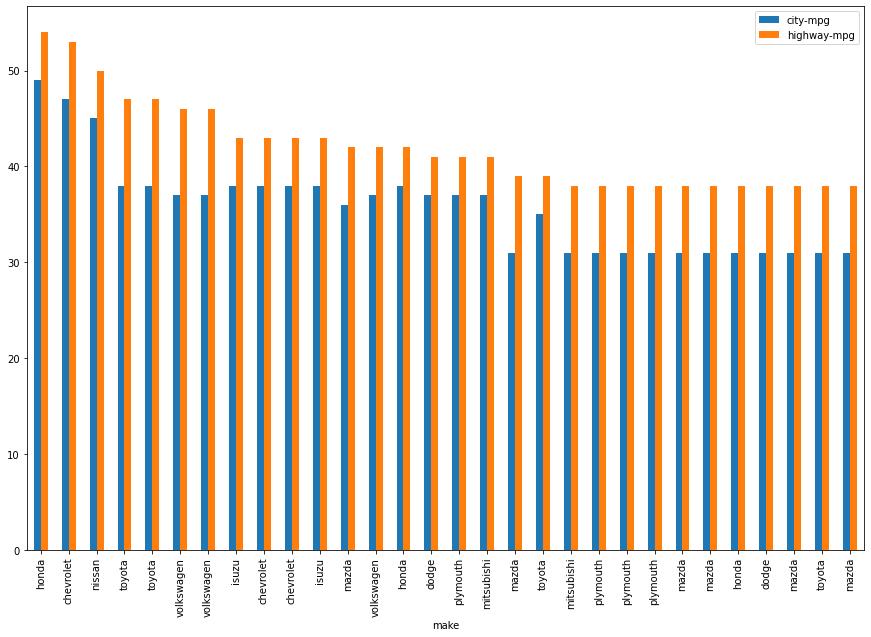

In [65]:
# City vs Highway MPG for each make
mpg_make_df.plot(kind='bar', x='make', figsize=(15,10))

The percentage of body types within the dataset

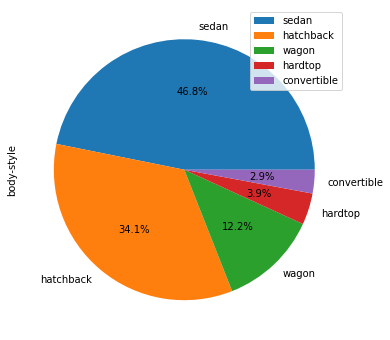

In [66]:
# Percentage of body-types within the dataset
fig, ax = plt.subplots()
x_axis = ['sedan','hatchback','wagon','hardtop','convertible']
count_body_style.plot.pie(figsize=(12,6),autopct='%1.1f%%')
ax.legend(x_axis)

The percentage of aspirations within the dataset

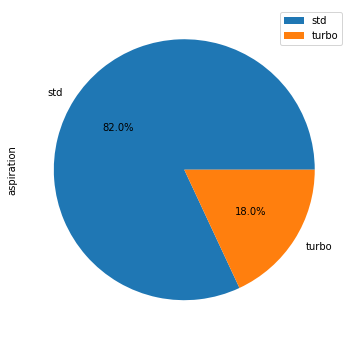

In [67]:
# Percentage of Aspirations within the dataset
fig, ax = plt.subplots()
x_axis = ['std','turbo']
aspiration_count.plot.pie(figsize=(12,6),autopct='%1.1f%%')
ax.legend(x_axis)

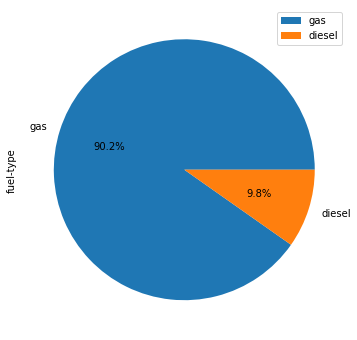

In [69]:
# Percentage of fuel type
fig, ax = plt.subplots()
fuel_type = fuel_make_df['fuel-type'].value_counts()
x_axis = ['gas', 'diesel']
fuel_type.plot.pie(figsize=(12,6),autopct='%1.1f%%')
ax.legend(x_axis)

References:

missing data retreived 20/11/2021 from https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

pandas to numeric retrieved 20/11/2021 from https://stackoverflow.com/questions/36814100/pandas-to-numeric-for-multiple-columns

pandas astype retrieved 20/11/2021 from  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html